# 課題１　チェス盤と小麦数

In [2]:
import numpy as np #行列
import pandas as pd #データ分析
import matplotlib.pyplot as plt
import seaborn as sns #matplotlibを使いやすくしたもの
%matplotlib inline

In [3]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]


In [4]:
import numpy as np

small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


## 【問題1】2×2マスのチェス盤の小麦の数

In [5]:
small_board_ndarray_matrix = small_board_ndarray.reshape(2, 2)
print(small_board_ndarray_matrix)

[[1 2]
 [4 8]]


## 【問題2】n×mマスへの拡張

In [19]:
# m行 n列とする。 initial = 最初の数、　power = 何倍になるか
def make_board(n, m, initial=1, power=2):
    n_squares = n * m
    board_list = [initial]
    for _ in range(n_squares - 1):
        board_list.append(power*board_list[-1])
    board_ndarray = (np.array(board_list)).reshape(n, m)
    return board_ndarray

In [20]:
print(make_board(2, 2))

[[1 2]
 [4 8]]


In [21]:
print(make_board(3, 3))

[[  1   2   4]
 [  8  16  32]
 [ 64 128 256]]


In [22]:
print(make_board(4, 6))

[[      1       2       4       8      16      32]
 [     64     128     256     512    1024    2048]
 [   4096    8192   16384   32768   65536  131072]
 [ 262144  524288 1048576 2097152 4194304 8388608]]


In [24]:
print(make_board(4, 6, 2, 3))

[[           2            6           18           54          162
           486]
 [        1458         4374        13122        39366       118098
        354294]
 [     1062882      3188646      9565938     28697814     86093442
     258280326]
 [   774840978   2324522934   6973568802  20920706406  62762119218
  188286357654]]


In [36]:
print((make_board(8, 8)))

[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.61168602e+18 9.22337204e+18]]

## 【問題3】小麦の数の合計

In [49]:
make_board(2, 2)

array([[1, 2],
       [4, 8]])

In [27]:
np.sum(make_board(2, 2)) #全ての和になっている

15

In [43]:
make_board(2, 2).sum()

15

In [46]:
chess_board=make_board(8, 8)
print('8×8のボード上の小麦の合計は{: .3g}個'.format(chess_board.sum()))

8×8のボード上の小麦の合計は 1.84e+19個


In [47]:
make_board(2, 2).mean(axis=0)

array([2.5, 5. ])

In [48]:
make_board(2, 2).mean(axis=1)

array([1.5, 6. ])

In [57]:
chess_board_mean_retsu=chess_board.mean(axis=0)

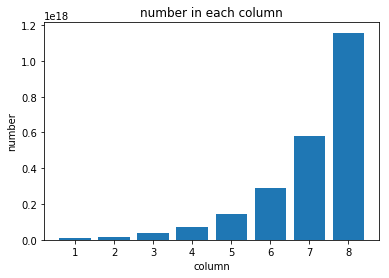

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,9), chess_board_mean_retsu)
plt.show()

## 【問題4】小麦の数のヒートマップ

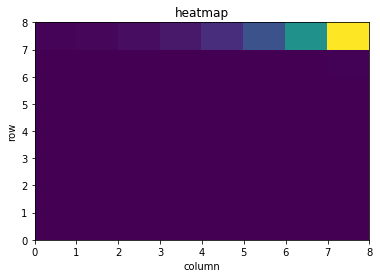

In [59]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(chess_board)
plt.show()

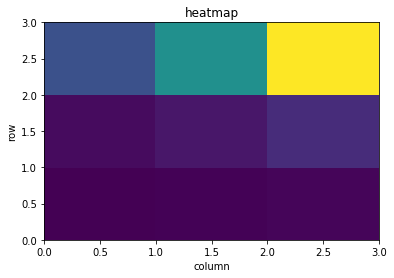

In [61]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(make_board(3, 3))
plt.show()

## 【問題5】後半は前半の何倍か

In [62]:
chess_board_mean_gyou=chess_board.mean(axis=1)

In [64]:
print(chess_board_mean_gyou)

[3.18750000e+01 8.16000000e+03 2.08896000e+06 5.34773760e+08
 1.36902083e+11 3.50469331e+13 8.97201488e+15 2.29683581e+18]


In [66]:
a=chess_board_mean_gyou[:4]
a

array([3.1875000e+01, 8.1600000e+03, 2.0889600e+06, 5.3477376e+08])

In [68]:
b=chess_board_mean_gyou[4:]
b

array([1.36902083e+11, 3.50469331e+13, 8.97201488e+15, 2.29683581e+18])

In [77]:
print('上下４行の和の倍数は{:,}倍です'.format(b.sum()/a.sum()))

上下４行の和の倍数は4,294,967,296.0倍です


### 検算

In [80]:
2**32 #理論上[0, 0]=1と[4, 0]=2^32の倍率になる

4294967296

## 他の計算方法

In [81]:
n_squares = 4
small_board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


In [83]:
n_squares = 4
indices_of_squares = np.arange(n_squares)
print(indices_of_squares)
small_board_ndarray = 2**indices_of_squares
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

[0 1 2 3]
4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


In [84]:
n_squares = 64
board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])
print("最後のマスの小麦の数：{}".format(board_ndarray[-1])) # -9223372036854775808

最後のマスの小麦の数：-9223372036854775808


/Users/ikono/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in long_scalars
  after removing the cwd from sys.path.


In [85]:
n_squares = 64
indices_of_squares = np.arange(n_squares)
board_ndarray = 2**indices_of_squares
print("最後のマスの小麦の数：{}".format(board_ndarray[-1])) # -9223372036854775808

最後のマスの小麦の数：-9223372036854775808


In [86]:
print(board_ndarray.dtype)

int64


In [87]:
2**64

18446744073709551616

In [88]:
n_squares = 64
indices_of_squares = np.arange(n_squares).astype(np.uint64)
board_ndarray = 2**indices_of_squares
print("最後のマスの小麦の数：{}".format(board_ndarray[-1])) # 9223372036854775808

最後のマスの小麦の数：9223372036854775808


In [90]:
2**63

9223372036854775808

## 【問題6】他の計算方法によるn×mマスへの拡張

In [94]:
# m行 n列とする。 initial = 最初の数、　power = 何倍になるか
def make_board_append(n, m, initial=1, power=2):
    n_squares = n * m
    board_list = np.array([initial]).astype(np.uint64)
    for _ in range(n_squares - 1):
        board_list=np.append(board_list, power*board_list[-1])
    board_ndarray = board_list.reshape(n, m)
    return board_ndarray

In [95]:
make_board_append(2, 3)

array([[ 1.,  2.,  4.],
       [ 8., 16., 32.]])

In [96]:
make_board_append(8, 8)

array([[1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01, 6.40000000e+01, 1.28000000e+02],
       [2.56000000e+02, 5.12000000e+02, 1.02400000e+03, 2.04800000e+03,
        4.09600000e+03, 8.19200000e+03, 1.63840000e+04, 3.27680000e+04],
       [6.55360000e+04, 1.31072000e+05, 2.62144000e+05, 5.24288000e+05,
        1.04857600e+06, 2.09715200e+06, 4.19430400e+06, 8.38860800e+06],
       [1.67772160e+07, 3.35544320e+07, 6.71088640e+07, 1.34217728e+08,
        2.68435456e+08, 5.36870912e+08, 1.07374182e+09, 2.14748365e+09],
       [4.29496730e+09, 8.58993459e+09, 1.71798692e+10, 3.43597384e+10,
        6.87194767e+10, 1.37438953e+11, 2.74877907e+11, 5.49755814e+11],
       [1.09951163e+12, 2.19902326e+12, 4.39804651e+12, 8.79609302e+12,
        1.75921860e+13, 3.51843721e+13, 7.03687442e+13, 1.40737488e+14],
       [2.81474977e+14, 5.62949953e+14, 1.12589991e+15, 2.25179981e+15,
        4.50359963e+15, 9.00719925e+15, 1.80143985e+16, 3.

In [109]:
# m行 n列とする。 initial = 最初の数、　power = 何倍になるか
def make_board_broadcast(n, m, initial=1, power=2):
    n_squares = n * m
    board_list = np.arange(n_squares).astype(np.uint64)
    board_list= initial * power ** board_list
    board_ndarray = board_list.reshape(n, m)
    return board_ndarray

In [110]:
make_board_broadcast(2, 2)

array([[1, 2],
       [4, 8]], dtype=uint64)

In [111]:
make_board_broadcast(2, 3)

array([[ 1,  2,  4],
       [ 8, 16, 32]], dtype=uint64)

In [113]:
make_board_broadcast(2, 3, 3)

array([[ 3,  6, 12],
       [24, 48, 96]], dtype=uint64)

In [114]:
make_board_broadcast(2, 3, 3, 5)

array([[   3,   15,   75],
       [ 375, 1875, 9375]], dtype=uint64)

In [115]:
make_board_broadcast(8, 8)

array([[                  1,                   2,                   4,
                          8,                  16,                  32,
                         64,                 128],
       [                256,                 512,                1024,
                       2048,                4096,                8192,
                      16384,               32768],
       [              65536,              131072,              262144,
                     524288,             1048576,             2097152,
                    4194304,             8388608],
       [           16777216,            33554432,            67108864,
                  134217728,           268435456,           536870912,
                 1073741824,          2147483648],
       [         4294967296,          8589934592,         17179869184,
                34359738368,         68719476736,        137438953472,
               274877906944,        549755813888],
       [      1099511627776,       

In [116]:
type(make_board_broadcast(8, 8))

numpy.ndarray

In [119]:
type(make_board_append(8, 8))

numpy.ndarray

# 疑問
何故、２つの方法で最後にdtypeが表示される、されないが違う？

## 【問題7】計算時間の比較

In [120]:
%%timeit
make_board(8, 8)

14.4 µs ± 525 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [121]:
%%timeit
make_board_append(8, 8)

274 µs ± 13 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [122]:
%%timeit
make_board_broadcast(8, 8)

4.3 µs ± 104 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## 考察      
pythonのappendに比べるとnumpyのappendはかなり遅い（1/20くらい）     　

数値の桁数の制限がnpあるが、この場合は高速化されていない  　　　　

ブロードキャストは一番速い（3倍、60倍）　　　　
 
forに時間がかかる